# Proyecto Integrador IV
> E-Commerce Data Pipeline

En este notebook, primero ejecutaremos todos los componentes de nuestro pipeline ELT y luego realizaremos visualizaciones con la información resultante


In [13]:
# Importing the necessary libraries
from pandas import DataFrame
from sqlalchemy import create_engine
from typing import Dict
from pathlib import Path

from src.transform import QueryEnum
from src import config
from src.transform import run_queries
from src.extract import extract
from src.load import load
from src.plots import (
    plot_freight_value_weight_relationship,
    plot_global_amount_order_status,
    plot_real_vs_predicted_delivered_time,
    plot_revenue_by_month_year,
    plot_revenue_per_state,
    plot_top_10_least_revenue_categories,
    plot_top_10_revenue_categories,
    plot_delivery_date_difference,
    plot_order_amount_per_day_with_holidays,
)

In [2]:
# Create the database sql file
Path(config.SQLITE_BD_ABSOLUTE_PATH).touch()

# Create the database connection
ENGINE = create_engine(rf"sqlite:///{config.SQLITE_BD_ABSOLUTE_PATH}", echo=False)

### 1. Extract

Aquí estarás extrayendo la información de las fuentes.

In [3]:
csv_folder = config.DATASET_ROOT_PATH
public_holidays_url = config.PUBLIC_HOLIDAYS_URL

# 1. Get the mapping of the csv files to the table names.
csv_table_mapping = config.get_csv_to_table_mapping()

# 2. Extract the data from the csv files, holidays and load them into the dataframes.
csv_dataframes = extract(csv_folder, csv_table_mapping, public_holidays_url)

### 2. Load

Usando los diferentes conjuntos de datos proporcionados, almacenarás todo en nuestro Data Warehouse.

In [14]:
load(data_frames=csv_dataframes, database=ENGINE)

Tabla olist_customers cargado correctamente en la base de datos
Tabla olist_geolocation cargado correctamente en la base de datos
Tabla olist_order_items cargado correctamente en la base de datos
Tabla olist_order_payments cargado correctamente en la base de datos
Tabla olist_order_reviews cargado correctamente en la base de datos
Tabla olist_orders cargado correctamente en la base de datos
Tabla olist_products cargado correctamente en la base de datos
Tabla olist_sellers cargado correctamente en la base de datos
Tabla product_category_name_translation cargado correctamente en la base de datos
Tabla public_holidays cargado correctamente en la base de datos


### 3. Transform

Aquí transformarás las diferentes consultas en tablas. Hay dos secciones: una con las consultas relacionadas con los ingresos y otra con las consultas relacionadas con las entregas.

##### 3.1 Queries sobre ingresos

In [15]:
query_results: Dict[str, DataFrame] = run_queries(database=ENGINE)

In [6]:
# Transforming the revenue_by_month_year query to a table
revenue_by_month_year = query_results[QueryEnum.REVENUE_BY_MONTH_YEAR.value]
revenue_by_month_year

,month_no,month,Year2016,Year2017,Year2018
0,01,Jan,0.00,138488.04,1115004.18
1,02,Feb,0.00,291908.01,992463.34
2,03,Mar,0.00,449863.60,1159652.12
3,04,Apr,0.00,417788.03,1160785.48
4,05,May,0.00,592918.82,1153982.15
5,06,Jun,0.00,511276.38,1023880.50
6,07,Jul,0.00,592382.92,1066540.75
7,08,Aug,0.00,674396.32,1022425.32
8,09,Sep,252.24,727762.45,4439.54
9,10,Oct,59090.48,779677.88,589.67


In [7]:
# Transforming the top_10_revenue_categories query to a table
top_10_revenue_categories = query_results[QueryEnum.TOP_10_REVENUE_CATEGORIES.value]
top_10_revenue_categories

,Category,Num_order,Revenue
0,beleza_saude,9465,1233131.72
1,relogios_presentes,5859,1166176.98
2,cama_mesa_banho,10953,1023434.76
3,esporte_lazer,8431,954852.55
4,informatica_acessorios,7644,888724.61
5,moveis_decoracao,8160,711927.69
6,utilidades_domesticas,6795,615628.69
7,cool_stuff,3718,610204.10
8,automotivo,4140,578966.65
9,brinquedos,4030,471286.48


In [8]:
# Transforming the top_10_least_revenue_categories query to a table
top_10_least_revenue_categories = query_results[
    QueryEnum.TOP_10_LEAST_REVENUE_CATEGORIES.value
]
top_10_least_revenue_categories

,Category,Num_order,Revenue
0,seguros_e_servicos,2,283.29
1,fashion_roupa_infanto_juvenil,7,519.95
2,cds_dvds_musicais,14,730.00
3,casa_conforto_2,30,760.27
4,flores,33,1110.04
5,pc_gamer,8,1306.95
6,fraldas_higiene,37,1500.79
7,artes_e_artesanato,24,1814.01
8,la_cuisine,14,2054.99
9,fashion_esporte,29,2094.52


In [9]:
# Transforming the revenue_per_state query to a table
revenue_per_state = query_results[QueryEnum.REVENUE_PER_STATE.value]
revenue_per_state

,customer_state,Revenue
0,SP,5998226.96
1,RJ,2144379.69
2,MG,1872257.26
3,RS,890898.54
4,PR,811156.38
5,SC,623086.43
6,BA,616645.82
7,DF,355141.08
8,GO,350092.31
9,ES,325967.55


##### 3.2 Queries sobre entregas

In [10]:
# Transforming the delivery_date_difference query to a table
delivery_date_difference = query_results[QueryEnum.DELIVERY_DATE_DIFFERECE.value]
delivery_date_difference

,State,Delivery_Difference
0,AL,8
1,MA,9
2,BA,10
3,CE,10
4,ES,10
5,SE,10
6,MS,11
7,PI,11
8,RJ,11
9,SC,11


In [11]:
# Transforming the real vs predicted delivered time query to a table per month and year
real_vs_estimated_delivered_time = query_results[
    QueryEnum.REAL_VS_ESTIMATED_DELIVERED_TIME.value
]
real_vs_estimated_delivered_time

,month_no,month,Year2016_real_time,Year2017_real_time,Year2018_real_time,Year2016_estimated_time,Year2017_estimated_time,Year2018_estimated_time
0,01,Jan,NaN,12.65,14.08,NaN,39.51,26.30
1,02,Feb,NaN,13.17,16.95,NaN,31.85,24.53
2,03,Mar,NaN,12.95,16.30,NaN,24.73,22.03
3,04,Apr,NaN,14.92,11.50,NaN,27.35,23.68
4,05,May,NaN,11.32,11.42,NaN,24.28,22.89
5,06,Jun,NaN,12.01,9.24,NaN,24.02,27.77
6,07,Jul,NaN,11.59,8.96,NaN,23.32,19.69
7,08,Aug,NaN,11.15,7.73,NaN,23.48,15.19
8,09,Sep,54.81,11.85,NaN,18.49,22.44,NaN
9,10,Oct,19.60,11.86,NaN,55.68,23.02,NaN


In [12]:
# Transforming the global ammount of order status query to a table
global_ammount_order_status = query_results[QueryEnum.GLOBAL_AMMOUNT_ORDER_STATUS.value]
global_ammount_order_status

,order_status,Ammount
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


In [14]:
orders_per_day_and_holidays = query_results[
    QueryEnum.ORDERS_PER_DAY_AND_HOLIDAYS_2017.value
]
orders_per_day_and_holidays

Ellipsis

In [14]:
freight_value_weight_relationship = query_results[
    QueryEnum.GET_FREIGHT_VALUE_WEIGHT_RELATIONSHIP.value
]

### 4. Graficas de las tablas resultantes

Ahora, crearemos gráficos a partir de las diferentes consultas.

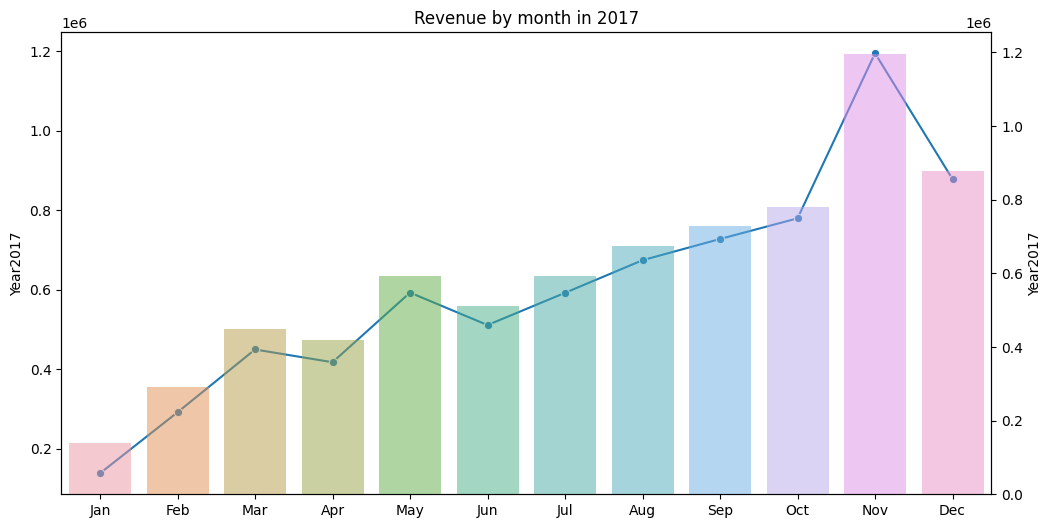

In [15]:
plot_revenue_by_month_year(revenue_by_month_year, 2017)

In [16]:
plot_top_10_revenue_categories(top_10_revenue_categories)

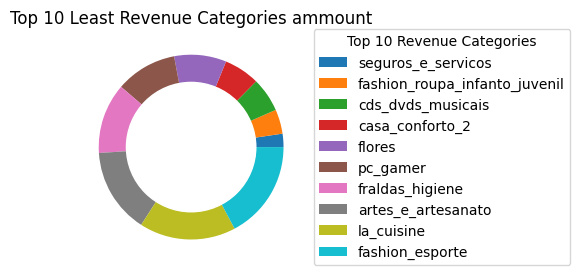

In [17]:
plot_top_10_least_revenue_categories(top_10_least_revenue_categories)

In [18]:
plot_revenue_per_state(revenue_per_state)

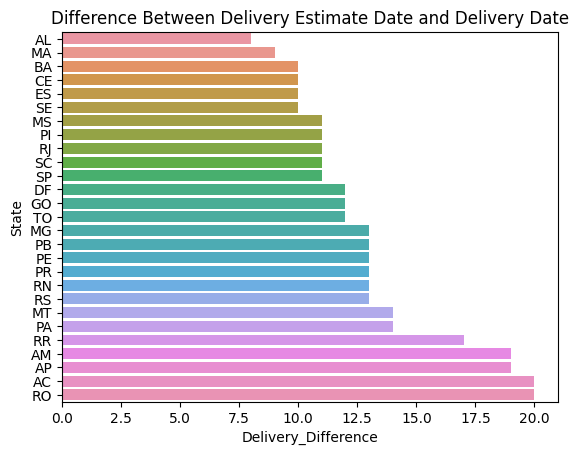

In [19]:
plot_delivery_date_difference(delivery_date_difference)

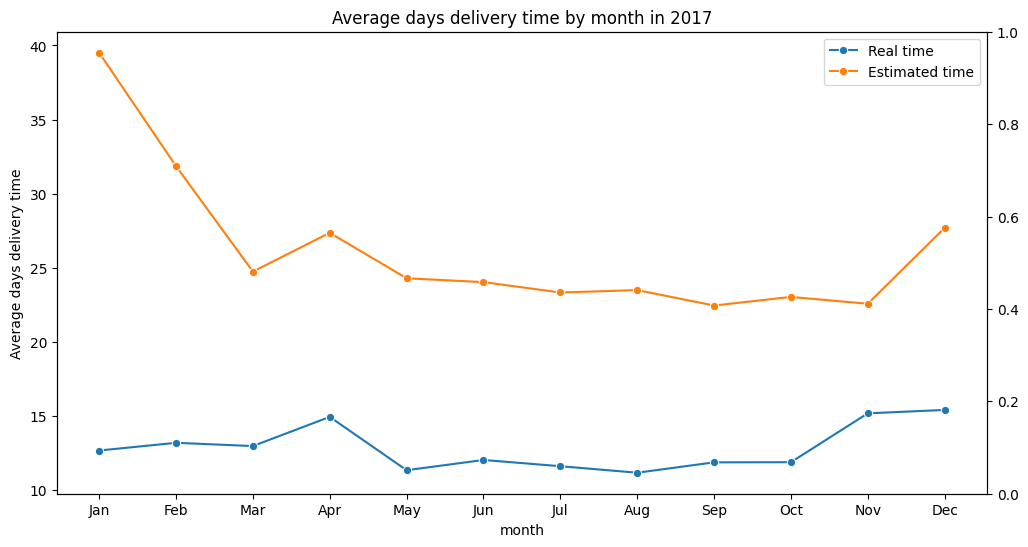

In [20]:
plot_real_vs_predicted_delivered_time(real_vs_estimated_delivered_time, year=2017)

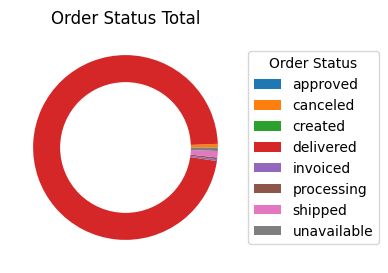

In [21]:
plot_global_amount_order_status(global_ammount_order_status)

In [ ]:
plot_order_amount_per_day_with_holidays(orders_per_day_and_holidays)

El gráfico de Pedidos por Día y Días Festivos que programarás en **src/plots.py** debe ser similar a este:

![The plot you will code will be similar to this:](images/orders_per_day_and_holidays.png "Orders per Day and Holidays")

4.1 ¿Ves alguna relación entre los días festivos en Brasil durante 2017 y las compras de ese año?

Respuesta: ________

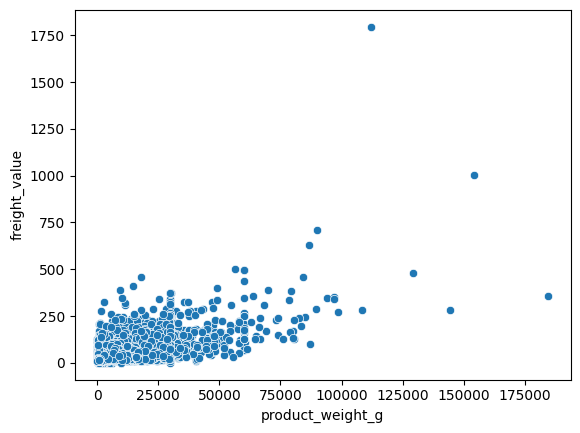

In [23]:
plot_freight_value_weight_relationship(freight_value_weight_relationship)

El gráfico sobre la relación entre el valor del flete y el peso del producto que debes programar en `src/plots.py` tiene que ser similar a este:

![The plot you will code will be similar to this:](images/freight_value_weight_relationship.png "Freight Value and Weight Relationship")

4.2 ¿Ves alguna correlación entre el valor del flete y el peso del producto?

Respuesta:____